## Modèles d'intégration avec la bibliothèque `scipy`

La bibliothèque `scipy.integrate` propose un modèle d'intégrateur. Il suffit de fournir une fonction qui transforme un état en sa dérivée à l'instant $t$ pour que le module intègre cette fonction.

Prenons l'exemple du lancer de boulet de canon. On considère une boule de masse $m$ et de rayon $r$ lancée du point $x_0$ avec une vitesse initiale $v_0$.

On commence par négliger toutes les forces autres que celle exercée par la gravité. Le champ est uniforme avec $g=9,81\,m\,s^{-2}$.

Le principe fondamental de la dynamique donne le système d'équations:
\begin{cases}
\;\ddot{x}(t) =  -g\cdot\vec{z}\\
\;\dot{x}(0) =  v_0\\
\;x(0) =  x_0
\end{cases}

Ce système s'intègre simplement en un polynôme du second degré. On propose ici de résoudre ce système à l'aide de l'intégrateur fourni dans `scipy`.

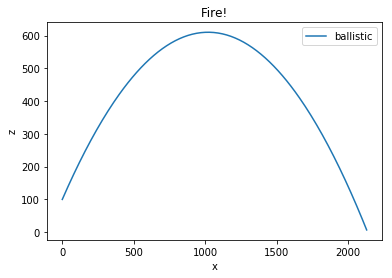

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from scipy.integrate import odeint

def forces(state, t):
    m = 2.                     # kilograms
    g = np.array([0, -9.8])    # metres per second
    
    dstate = state.copy()
    dstate[:2] = state[2:]
    dstate[2:] = g
        
    return dstate

# x_0, z_0, \dot{x}_0, \dot{z}_0
state0 = np.array([0., 100., 100., 100.])

t = np.arange(0.0, 30.0, 0.1)

state = odeint(forces, state0, t)

state=state[np.where(state[:,1] >=0)]

plt.plot(state[:,0], state[:,1])

plt.xlabel('x')
plt.ylabel('z')
plt.title('Fire!')
plt.legend(('ballistic', ))

<div class="alert alert-warning">
**Exercice:** Ajouter la force de frottement à l'air et comparer les trajectoires sur le même graphe.
</div>

**Note**: La force de frottement à l'air s'exerce en opposition au vecteur vitesse. Son module s'exprime de la manière suivante:
$$F = \frac{1}{2}\cdot C_x \cdot \rho \cdot S \cdot V^{2}$$

On prendra $C_x = 0.5$ (sphère), une surface de référence $S =0,1\,m^2$ et $\rho = 1,184\;kg\,m^{-3}$ la masse volumique de l'air.

### L'attracteur de Lorenz

L'attracteur de Lorenz est une bonne illustration d'un système chaotique. Il est modélisé par les équations suivantes:

$$\dot{x} = \sigma (y - x)$$
$$\dot{y} = (\rho - z) x - y$$
$$\dot{z} = x\, y - \beta\, z$$

On prendra $\sigma = 10$, $\rho = 28$ et $\beta = \dfrac{8}{3}$

<div class="alert alert-warning">
**Exercice:** Intégrer les équations sur l'intervalle donné.
</div>

In [ ]:
from scipy.integrate import odeint

def lorenz(state, t):
    x = state[0]
    y = state[1]
    z = state[2]

    # fill here
    
    return [x, y, z]

state0 = [2.0, 3.0, 4.0]
t = np.arange(0.0, 30.0, 0.01)

state = odeint(lorenz, state0, t)

# do some fancy 3D plotting
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(state[:,0], state[:,1], state[:,2], alpha=0.4)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')


Le système semble avoir deux équilibres stables : les deux circuits. Le système gravite autour d'un voisinage pour parfois changer de voisinage. Le nombre de cycles dans un voisinage et le moment auquel le système change de voisinage sont extrêmement dépendants des conditions initiales.

<div class="alert alert-warning">
**Exercice:** Afficher la trace précédent dans le plan 2D. Puis afficher les traces (position et trace pendant les 100 dernières millisecondes) de deux points extrêmement proches pour détecter le moment où les trajectoires divergent.
</div>

On pourra afficher les traces toutes les 5 secondes, puis toutes les secondes entre 15 et 20 secondes.